In [19]:
%pylab inline
import numpy as np
from simpegEMIP import FDEM
import matplotlib
matplotlib.rcParams['font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


In [20]:
f = np.logspace(-7, 4)
sigma_sulfide = FDEM.ColeColeSeigel(f, 1., 0.4, 1., 0.4)
sigma_graphite= FDEM.ColeColeSeigel(f, 1., 0.4, 10., 0.4)

In [21]:
from simpegEM1D import DigFilter
time = np.logspace(-3,np.log10(100), 41)
wt, tbase, omega_int = DigFilter.setFrequency(time)
frequency = omega_int / (2*np.pi)
sigma_freq_sulfide = FDEM.ColeColeSeigel(frequency, 1., 0.4, 1., 0.4)
sigma_time_sulfide = DigFilter.transFiltImpulse(sigma_freq_sulfide, wt, tbase, omega_int, time, tol=1e-12)

sigma_freq_graphite = FDEM.ColeColeSeigel(frequency, 1., 0.4, 10., 0.4)
sigma_time_graphite = DigFilter.transFiltImpulse(sigma_freq_graphite, wt, tbase, omega_int, time, tol=1e-12)


In [22]:
fig_dir = '/Users/sgkang/Dropbox/spectral_ip_paper/figures/'

In [23]:
# fig = plt.figure()
# ax = plt.subplot(111)
# ax_1 = ax.twinx()
# ax.semilogx(f, sigma_sulfide.real, 'k')
# ax_1.semilogx(f, sigma_sulfide.imag, 'r')
# ax_1.set_ylim(0, 0.2)
# ax.set_ylim(0, 1.1)
# ax_1.tick_params('y', colors='r')
# ax.set_xlim(f.min(), f.max())
# ax.set_xlabel("Frequency (Hz)")
# ax.set_ylabel('$Re[\sigma(\omega)]$', color='k')
# ax_1.set_ylabel('$Im[\sigma(\omega)]$', color='r')
# ax.set_title("Complex conductivity, $\sigma(\omega)$")
# plt.tight_layout()
# fig.savefig(fig_dir+"complex_conductivity", dpi=200)

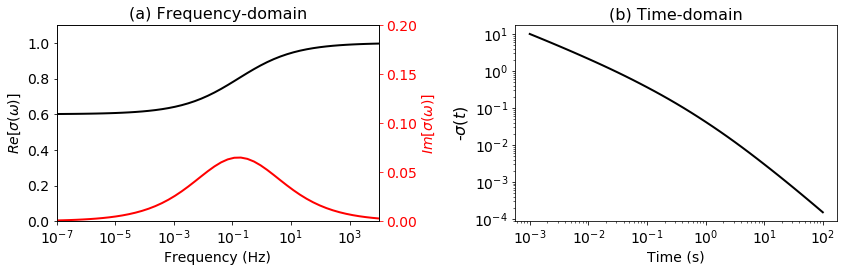

In [24]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)
ax_1 = ax.twinx()
ax.semilogx(f, sigma_sulfide.real, 'k', lw=2)
ax_1.semilogx(f, sigma_sulfide.imag, 'r', lw=2)
# ax.semilogx(f, sigma_graphite.real, 'k--', lw=2)
# ax_1.semilogx(f, sigma_graphite.imag, 'r--', lw=2)
ax.set_ylabel('$Re[\sigma(\omega)]$', color='k')
ax_1.set_ylabel('$Im[\sigma(\omega)]$', color='r')

ax_1.tick_params('y', colors='r')
ax.set_xlim(f.min(), f.max())
ax.set_xlabel("Frequency (Hz)")
ax_1.set_ylim(0, 0.2)
ax.set_ylim(0, 1.1)
ax2.loglog(time, -sigma_time_sulfide, 'k', lw=2)
# ax2.loglog(time, -sigma_time_graphite, 'k--', lw=2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("-$\sigma(t)$", fontsize=16)
ax.set_title("(a) Frequency-domain", fontsize=16)
ax2.set_title("(b) Time-domain", fontsize=16)
plt.tight_layout()
fig.savefig(fig_dir+"complex_conductivity", dpi=200)

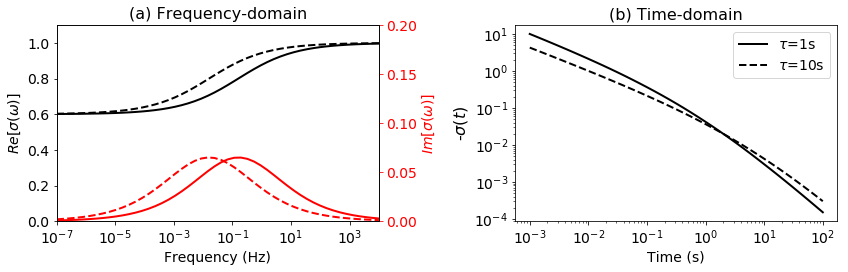

In [25]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(121)
ax2 = plt.subplot(122)
ax_1 = ax.twinx()
ax.semilogx(f, sigma_sulfide.real, 'k', lw=2)
ax_1.semilogx(f, sigma_sulfide.imag, 'r', lw=2)
ax.semilogx(f, sigma_graphite.real, 'k--', lw=2)
ax_1.semilogx(f, sigma_graphite.imag, 'r--', lw=2)
ax.set_ylabel('$Re[\sigma(\omega)]$', color='k')
ax_1.set_ylabel('$Im[\sigma(\omega)]$', color='r')

ax_1.tick_params('y', colors='r')
ax.set_xlim(f.min(), f.max())
ax.set_xlabel("Frequency (Hz)")
ax_1.set_ylim(0, 0.2)
ax.set_ylim(0, 1.1)
ax2.loglog(time, -sigma_time_sulfide, 'k', lw=2)
ax2.loglog(time, -sigma_time_graphite, 'k--', lw=2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("-$\sigma(t)$", fontsize=16)
ax.set_title("(a) Frequency-domain", fontsize=16)
ax2.set_title("(b) Time-domain", fontsize=16)
ax2.legend(("$\\tau$=1s", "$\\tau$=10s"))
plt.tight_layout()
fig.savefig(fig_dir+"complex_conductivity", dpi=200)

In [27]:
def peak(tau):
    return 1./(tau*2*np.pi)

In [28]:
peak(1)

0.15915494309189535

In [29]:
peak(30)

0.005305164769729845